https://codingdisciple.com/hypothesis-testing-welch-python.html

# Hypothesis Testing with Welch's t-test in Python

Suppose that we are in the data science team for an orange juice company. In the meeting, the marketing team claimed that their new marketing strategy resulted in an increase of sales. The management team asked us to determine if this is actually true.

This is the data from January and February.

Average Daily Sales in January = \$10,000, sample size = 31, variance = 10,000,000  
Average Daily Sales in February = $12,000, sample size = 28, variance = 20,000,000  
How do we know that the increase in daily orange juice sales was not due to random variation in data?

## The Null and Alternative Hypothesis
The amount of sales per day is not consistent throughout the month. The January data has a variance of 10,000,000 and a standard deviation of ~3162. On bad days, we would sell \$8,000 of orange juice. On good days, we would sell $14,000 of orange juice. We have to prove that the increase in average daily sales in February did not occur purely by chance.

The null hypothesis would be:

$$H_0 = \mu_0 - \mu_1 = 0$$

There are three possible alternative hypothesis:

$$H_a : \mu_0 < \mu_1 $$

$$H_a : \mu_0 > \mu_1 $$

$$H_a : \mu_0 =/= \mu_1 $$

Where μ0 is the average daily sales in January, and μ1 is the average daily sales in February. Our null hypothesis is simply saying that there is no change in average daily sales.

If we are interested in concluding that the average daily sales has increased then we would go with the first alternative hypothesis. If we are interested in concluding that the average daily sales has decreased, then we would go with the second alternative hypothesis. If we are interested in concluding that the average daily sales changed, then we would go with the third alternative hypothesis.

In our case, the marketing department claimed that the sales has increased. So we would use the first alternative hypothesis.

## Type I and II Errors
We have to determine whether we accept or reject the null hypothesis. This could result in four different outcomes.

* Retained the null hypothesis, and the null hypothesis was correct. (No error)
* Retained the null hypothesis, but the alternative hypothesis was correct. (Type II error, false negative)
* Rejected the null hypothesis, but the null hypothesis was correct. (Type I error, false positive)
* Rejected the null hypothesis, and the alternative hypothesis was correct. (No error)

Hypothesis testing uses the same logic as a court trial. The null hypothesis(defendent) is innocent until proven guilty. We use data as evidence to determine if the claims made against the null hypothesis is true.

## Significance Level
In order to come to a decision, we need to know if the February data is statistically significant. We would have to calculate the probability of finding the observed, or more extreme data assuming that the null hypothesis, H0 is true. This probability is known as the p-value.

If this probability is high, we would retain the null hypothesis. If this probability is low, we would reject the null hypothesis. This probability threshold known as the significance level, or α. Many statisticians typically use α = 0.05.

To visualize this using the probabiliy distribution, recall that we've chosen to prove that μ0<μ1. This is called a right-tailed test.

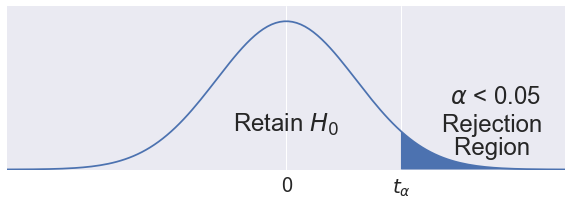

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns
from scipy.integrate import simps
%matplotlib inline

#The Gaussian Function
def g(x):
    return 1/(math.sqrt(1**math.pi))*np.exp(-1*np.power((x - 0)/1, 2)/2)

fig = plt.figure(figsize=(10,3))
x = np.linspace(-300, 300, 10000)
sns.set(font_scale=2)

#Draws the gaussian curve
ax = fig.add_subplot(1, 1, 1)
ax.plot(x, g(x))
ax.set_ylim(bottom = 0, top = 1.1)
ax.set_xlim(left = -4, right = 4)
ax.set_yticks([])
plt.xticks([0, 1.645], 
               [0, r'$t_\alpha$']
              )
    
#Fills the area under the curve
section = np.arange(1.645, 300, 1/2000)
ax.fill_between(section, g(section))

#Calculates the area under the curve using Simpson's Rule
x_range = np.linspace(1.645, 300, 2000)
y_range = g(x_range) 
area_total = simps(g(x), x)
area_part = simps(y_range , x_range)
percent_data = np.round((area_part/area_total), 2)
ax.annotate(r'$\alpha$ < {}'.format(percent_data), xy=(3, 0.45), ha='center')
ax.annotate('Rejection '.format(1-percent_data), xy=(3, 0.26), ha='center')
ax.annotate('Region '.format(1-percent_data), xy=(3, 0.1), ha='center')
ax.annotate('Retain $H_0$', xy=(0, 0.26), ha='center')
plt.show()

We don't know where the data from February is on this distribution. We'll still to calculate the p-value to determine if we are in the rejection region. The p-value can only answer this question: how likely is February data, assuming that the null hypothesis is true? If we do end up with a p-value less than 0.05, then we will reject the null hypothesis.

## Other Cases:
If our alternative hypothesis was μ0>μ1, then we would have to use a left-tailed test, which is simply the flipped veresion of the right-tailed test.

If our alternative hypothesis was μ0≠μ1, then we would have to use a two-tailed test, which is both the left and right tailed test combined with α = 0.025 on each side.

## The Welch's t-test
One way to tackle this problem is to calculate the probability of finding February data in the rejection region using the Welch's t-test. This version of the t-test can be used for equal or unequal sample sizes. In addition, this t-test can be used for two samples with different variances. This is often praised as the most robust form of the t-test. However, the Welch's t-test assumes that the two samples of data are independent and identically distributed.

The t-score can be calculated using the following formula:

$$ t_{score} = \frac{\bar{X_1} - \bar{X_2}}{s_{welch}} $$

$$ s_{welch} = \sqrt{\frac{s_1^2}{n_1} + \frac{s^2_2}{n_2}} $$

$$ DoF =  \frac{(\frac{s_1^2}{n_1} + \frac{s^2_2}{n_2})^2}{\frac{(s_1^2/n_1)^2}{n_1 - 1} + \frac{(s^2_2/n_2)^2}{n_2 - 1}} $$

Where X¯ is the sample average, s is the variance, and n is the sample size. With the degrees of freedom and the t-score, we can use a t-table or a t-distribution calculator to determine the p-value. If the p-value is less than the significance level, then we can conclude that our data is statistically significant and the null hypothesis will be rejected.

We could plug in every number into python, and then looking up a t-table. But it is easier to just use the scipy.stats module. Click here for the link to the documentation.

In [2]:
from scipy import stats

t_score = stats.ttest_ind_from_stats(mean1=12000, std1=np.sqrt(10000000), nobs1=31, \
                               mean2=10000, std2=np.sqrt(20000000), nobs2=28, \
                               equal_var=False)
t_score

Ttest_indResult(statistic=1.9641226483541647, pvalue=0.05531232625026703)

From the Welch's t-test we ended up with a p-value of 0.055. Scipy calculates this value based on the two tailed case. If we just want the p-value of the right-tail, we can divide this value by 2. This means that the probability that there is a ~2.57% chance of finding the observed values from February given the data from January. We should reject the null hypothesis.